# Exercise 6  Egor Gordeev

## Part I

(1) Generate a Fourier series by using:  

$f(t)=a_0/2 + \sum_{n=1}^4 a_n\cos(nt)+b_n\sin(nt)$   
  
with $a$ and $b$:   
$a_n=[0.9,0.7,0.5,0.3]$ and $b_n=[1,0,0,0]$   
for $t_i\in\{-2\pi,...,2\pi\}$ of length $2001$ and plot it.    
  
(2) Calculate the Fast Fourier Transformation of $f(t)$ by using the fft function from the library numpy.fft.fft(). Plot the 12 first and last values of the fft. Do you see the initial parameters $a$ and $b$?    
  
(3) From this fft calculate again the original Fourier series by:  
- Using $X(t)=\sum_{-\infty}^{\infty} A_ne^{i2\pi f_nt}$ with $f_n=n/(4\pi)$. 
- Using the inverse fft from the library np.fft.ifft()    

Plot both in the same diagram. Are they the same? (They should be)



In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
jtplot.style(theme='chesterish')

In [30]:
def get_inverse_F(fft_out):
    signal_whole=np.zeros(len(t_arr))
    for n in range(1000):
        if n==0:
            signal_part=0.5*fft_out[2*n]*np.exp(1j*2*n*2*np.pi/(4*np.pi)*t_arr)
        else:
            signal_part=fft_out[2*n]*np.exp(1j*2*n*2*np.pi/(4*np.pi)*t_arr)
#         a=np.real(fft_out[n])
#         b=np.imag(fft_out[n])
        
#         signal_part=a*np.cos(n/(2*np.pi)*t_arr)+i*b*np.sin(n/(2*np.pi)*t_arr)
        signal_whole=signal_whole+signal_part
        
    return signal_whole

In [5]:
def get_ftdomain(a_arr,b_arr,t_arr):
    signal=np.zeros(len(t_arr))
    for i in range(1,len(a_arr)+1):
        harmonic=a_arr[i-1]*np.cos(i*t_arr)+b_arr[i-1]*np.sin(i*t_arr)
        signal=signal+harmonic
        
    return signal

In [6]:
nt=2001
a_arr=np.array([0.9,0.7,0.5,0.3])
b_arr=np.array([1,0,0,0])
t_arr=np.linspace(-2*np.pi,2*np.pi,nt)

In [10]:
whos

Variable        Type        Data/Info
-------------------------------------
a_arr           ndarray     4: 4 elems, type `float64`, 32 bytes
b_arr           ndarray     4: 4 elems, type `int64`, 32 bytes
get_fourier     function    <function get_fourier at 0x7f6a4bc08320>
get_inverse_F   function    <function get_inverse_F at 0x7f6a78516cb0>
jtplot          module      <module 'jupyterthemes.jt<...>jupyterthemes/jtplot.py'>
np              module      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
nt              int         2001
plt             module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
signal1         ndarray     2001: 2001 elems, type `float64`, 16008 bytes
signal2         ndarray     2001: 2001 elems, type `float64`, 16008 bytes
t_arr           ndarray     2001: 2001 elems, type `float64`, 16008 bytes


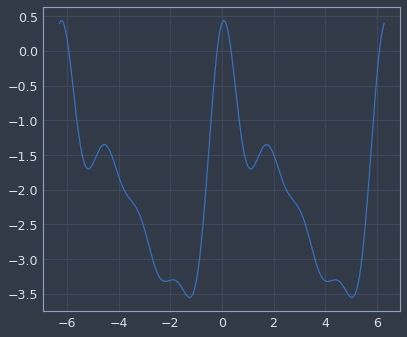

In [12]:
offset=4
fsignal=get_ftdomain(a_arr,b_arr,t_arr)-offset/2
plt.plot(t_arr,fsignal)

Calculate the Fast Fourier Transformation of 𝑓(𝑡) by using the fft function from the library numpy.fft.fft().

In [21]:
fft_out=np.fft.fft(fsignal)

In [22]:
fft_out

array([-3.99960000e+03+0.00000000e+00j,  2.76628672e+00-6.61767427e-01j,
        9.05625352e+02-9.97409528e+02j, ...,
        1.88644084e+00-1.21046057e+00j,  9.05625352e+02+9.97409528e+02j,
        2.76628672e+00+6.61767427e-01j])

In [91]:
[print("{:10.4f}".format(i)) for i in np.abs(fft_out)[:4]]

 3999.6000
    2.8443
 1347.2131
    2.2414


[None, None, None, None]

Plot the 12 first and last values of the fft. Do you see the initial parameters 𝑎 and 𝑏?

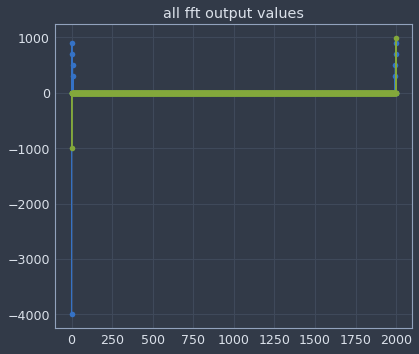

In [23]:
plt.title('all fft output values')
plt.plot(np.real(fft_out),'-o')
plt.plot(np.imag(fft_out),'-o')

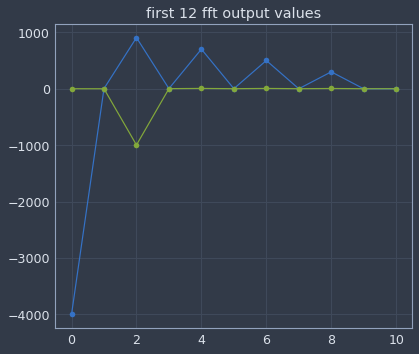

In [24]:
plt.title('first 12 fft output values')
plt.plot(np.real(fft_out[:11]),'-o')
plt.plot(np.imag(fft_out[:11]),'-o')

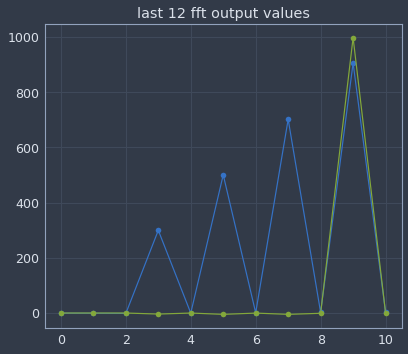

In [25]:
plt.title('last 12 fft output values')
plt.plot(np.real(fft_out[-11:]),'-o')
plt.plot(np.imag(fft_out[-11:]),'-o')

QUESTION: why only every 2nd element in np.fft.fft output is relevant?

In [31]:
ftdomain=get_inverse_F(fsignal)

(3) From this fft calculate again the original Fourier series by:  
- Using $X(t)=\sum_{-\infty}^{\infty} A_ne^{i2\pi f_nt}$ with $f_n=n/(4\pi)$. 
- Using the inverse fft from the library np.fft.ifft()   

/home/igor/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/igor/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


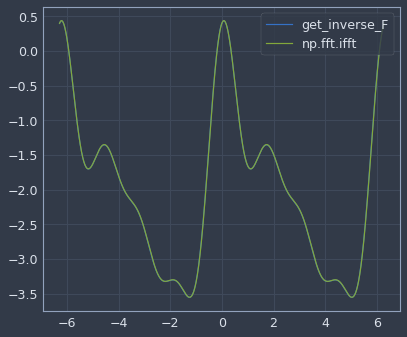

In [40]:
plt.plot(t_arr,get_inverse_F(fft_out)/1000,label='get_inverse_F');
plt.plot(t_arr,np.fft.ifft(fft_out),label='np.fft.ifft');
plt.legend();

QUESTION:why should we devide the output of the get_inverse_F by 1000? Why not by 1001 or 999?
If we have N elements in in the input of get_inverse_F, should we divide by rounded N/2 to get the correct values?

## Part II (Homework)


(1) Generate ar AR process of order 1 with $\alpha=0.9$ of length 100.
(2) Calculate the symetric, biased autocovariance function of these AR(1) for two different ranges of $\tau$.  
1. $\tau\in\{-10,9,...,9\}$
2. $\tau\in\{-max,-max+1,...,max-1\}$  
  

(3) Calculate the Fast Fourier Transformation of the symmetric autocovariance functions for and plot your results for each range of $\tau$ seperated.  
(4) Describe what you can observe?  

 

In [104]:
# WHITE NOISE PARAMS
mu=0
sigma=5
nt=100 #  n of samples
WN_arr = np.random.normal(loc=mu,scale=sigma,size=nt)
#AR1 params
alpha=0.9
x0=WN_arr[0]

In [89]:
def get_AR1(nt,alpha,x0,WN_arr):
    AR1_arr=np.zeros(nt)
    AR1_arr[0]=x0
    for i in range(1,nt):
        AR1_arr[i]=AR1_arr[i-1]*alpha+WN_arr[i]
        
    return AR1_arr

 Generate ar AR process of order 1 with $\alpha=0.9$ of length 100.

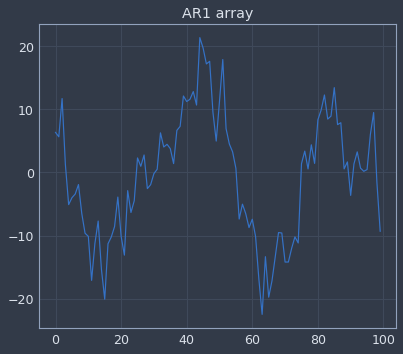

In [105]:
AR1_arr=get_AR1(nt,alpha,x0,WN_arr)
plt.plot(AR1_arr);
plt.title("AR1 array");

 Calculate the symetric, biased autocovariance function of these AR(1) for two different ranges of $\tau$.  
1. $\tau\in\{-10,9,...,9\}$

In [106]:
def autocov(tmin,tmax,xarr):
    N=len(xarr) # length of input array
    xmean=np.mean(xarr)
#     assert abs(tmin)<N | abs(tmax)<N
    
    tauarr = np.arange(tmin,tmax)
    autoarr = np.zeros(len(tauarr))
    for i in range(len(tauarr)):
#     autoarr[i]=autocov(tauarr[i],resid)
        xsum = 0
        tau = tauarr[i]
        for t in range(N-abs(tau)):
            xsum = xsum+(xarr[t] - xmean)*(xarr[t+tau]-xmean)

        curval=xsum/N
        autoarr[i]=curval
    
    return autoarr,tauarr

Text(0.5, 0, 'tau')

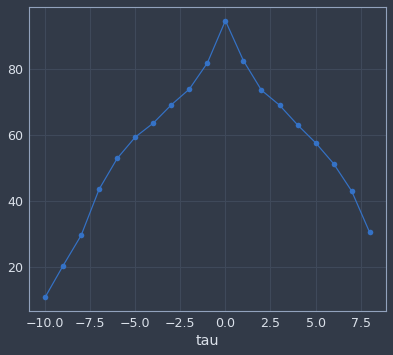

In [111]:
autoarr,tauarr = autocov(-10,9,AR1_arr)
plt.plot(tauarr,autoarr,'-o')
plt.xlabel('tau')

2. $\tau\in\{-max,-max+1,...,max-1\}$ 

Text(0.5, 0, 'tau')

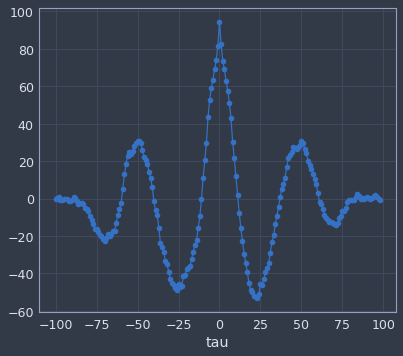

In [110]:
autoarr,tauarr = autocov(-100,99,AR1_arr)
plt.plot(tauarr,autoarr,'-o')
plt.xlabel('tau')

/home/igor/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:372: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


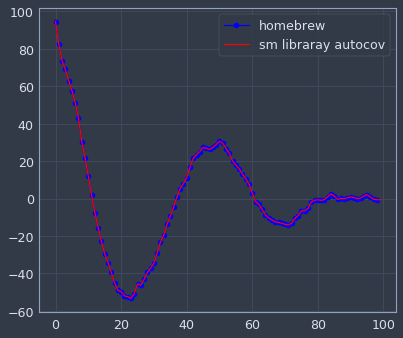

In [118]:
autoarr,tauarr = autocov(0,99,AR1_arr)
plt.plot(tauarr,autoarr,'-o',color='blue',label="homebrew")
plt.plot(smacovf(AR1_arr),color='red',label='sm libraray autocov')
plt.legend()

In [112]:
import statsmodels.api as sm
smacovf=sm.tsa.stattools.acovf

(3) Calculate the Fast Fourier Transformation of the symmetric autocovariance functions for and plot your results for each range of $\tau$ seperated.  

In [133]:
fft_out

array([1068.76541888 +0.j        , -275.95330971+40.73832123j,
        -36.41996984 +8.13837182j,  -58.90568632+30.53417223j,
         -3.81479014 -1.88901778j,  -20.98648232+13.66480906j,
         -3.89600648-11.39863716j,  -12.6965445  +8.52041181j,
         -8.32968673 -9.25629126j,  -10.75611538 +4.70598269j,
        -10.75611538 -4.70598269j,   -8.32968673 +9.25629126j,
        -12.6965445  -8.52041181j,   -3.89600648+11.39863716j,
        -20.98648232-13.66480906j,   -3.81479014 +1.88901778j,
        -58.90568632-30.53417223j,  -36.41996984 -8.13837182j,
       -275.95330971-40.73832123j])

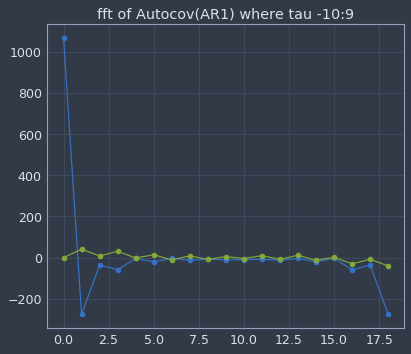

In [134]:
autoarr,tauarr = autocov(-10,9,AR1_arr)
fft_out=np.fft.fft(autoarr)
plt.title('fft of Autocov(AR1) where tau -10:9')
plt.plot(np.real(fft_out),'-o')
plt.plot(np.imag(fft_out),'-o')

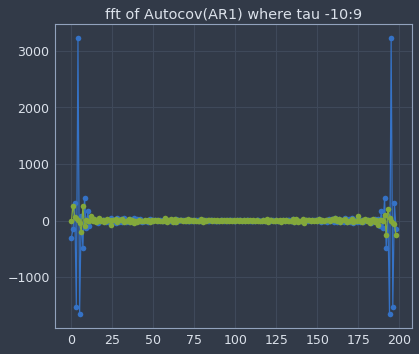

In [135]:
autoarr,tauarr = autocov(-100,99,AR1_arr)
fft_out=np.fft.fft(autoarr)
plt.title('fft of Autocov(AR1) where tau -10:9')
plt.plot(np.real(fft_out),'-o')
plt.plot(np.imag(fft_out),'-o')

Commentary:
    Green curve represent the FFT coefficients corresponding to sine function. As the acov output is symmetric function, it can be represented as a sum of symmetric functions - sum of cosines of different frequencies with different weights. Those cosine related weights are represented by real part of fft_output - blue curve.
    FFt from acov in tau range (-10,9) shows peak at the left - corresponds to the offset, or A[o] element in FFT representation of a singal.  